

objective: plot the t-SNE using BOW, Tfidf, average word2vec, Tfidf word2vec.

Note: I have taken 1k positive points and 1k negative points for analysis.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [3]:
# Load the clean data
conn = sqlite3.connect('final.sqlite')
clean_data = pd.read_sql_query(""" SELECT * FROM Reviews_clean WHERE Score != 3 """, conn) 

In [4]:
# See the dimension
clean_data.shape

(364171, 12)

In [5]:
clean_data.head(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...


In [ ]:
#1k positive and negative review

In [6]:
positive_data=clean_data[clean_data.Score==1].head(1000)

In [7]:
positive_data.shape

(1000, 12)

In [8]:
negative_data=clean_data[clean_data.Score==0].head(1000)

In [9]:
negative_data.shape

(1000, 12)

In [10]:
all_data=np.vstack((positive_data, negative_data))

In [11]:
all_data.shape

(2000, 12)

In [13]:
all_data=pd.DataFrame(all_data)

In [15]:
# First two rows
all_data.columns=clean_data.columns
all_data.head(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...


In [16]:
# Last two rows
all_data.tail(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
1998,38406,41700,B0000SXEMI,A2FZZIQLF48ZAS,Robert Cooper,2,3,0,1207526400,Tasted a bit artificial and too pungent.,Didn't taste at all natural like a real key li...,didnt tast natur like real key lime pie recomm...
1999,371915,402193,B0000SXENM,A2SY5Q718M72SN,tonytina27,1,1,0,1315872000,awful,This stuff is just awful. You can't even tell ...,stuff aw cant even tell suppos lemon flavor fa...


In [17]:
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(all_data['CleanedText'])

In [18]:
final_counts.shape

(2000, 7125)

In [19]:
ar_bow=final_counts.toarray()

In [20]:
ar_bow.shape

(2000, 7125)

In [21]:
%%time
from MulticoreTSNE import MulticoreTSNE as TSNE

Wall time: 152 ms


In [78]:
tsne = TSNE(n_components=2, random_state=0,n_jobs=5)
tsne_data = tsne.fit_transform(ar_bow)

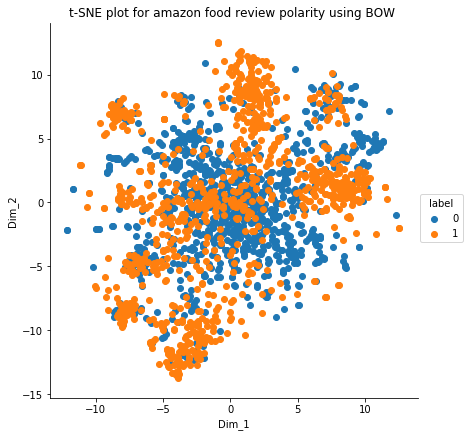

In [79]:
import seaborn as sn
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, all_data.Score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("t-SNE plot for amazon food review polarity using BOW ")
plt.show()

Observation:
    Using BOW, we can see that some positive words are cluster with high overlap of positive and negative words. 

# Using TIDF

In [24]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(all_data['CleanedText'].values)

In [25]:
final_tf_idf.shape

(2000, 74930)

In [28]:
ar_tidf=final_tf_idf.toarray()

In [29]:
ar_tidf.shape

(2000, 74930)

In [81]:
tsne = TSNE(n_components=2, random_state=0,n_jobs=5)
tsne_data = tsne.fit_transform(ar_tidf)

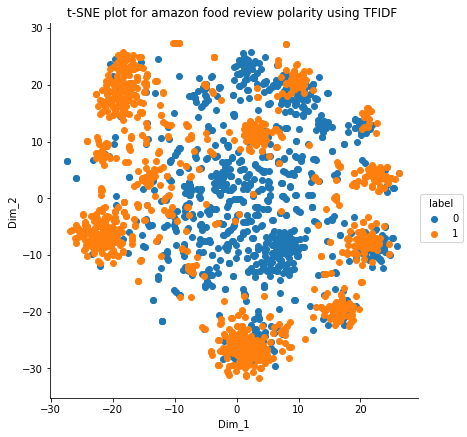

In [82]:
import seaborn as sn
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, all_data.Score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("t-SNE plot for amazon food review polarity using TFIDF ")
plt.show()

Observation:
    Using Tfidf, we can see that positive words are nicely cluster compare to BOW , though there is some overlap of positive and negative words. 

In [83]:
import gc
gc.collect()

28655

# Using Word2Vec

In [33]:
# Train your own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in all_data['CleanedText'].values:
    list_of_sent.append(sent.split())

In [34]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [38]:
w2v_model.wv.most_similar('man')

[('box', 0.9984444379806519),
 ('gave', 0.9984104633331299),
 ('green', 0.9984064102172852),
 ('sound', 0.9984020590782166),
 ('top', 0.998384952545166),
 ('releas', 0.9983838200569153),
 ('easi', 0.9983807802200317),
 ('soil', 0.9983788728713989),
 ('left', 0.9983787536621094),
 ('cold', 0.9983757138252258)]

As training on 2k text does not performing well so getting the data training on whole Amazon review data

# t-SNE on avg_w2v

In [40]:
avg_w2v_df=pd.read_csv("avg_w2v_df.csv")

In [41]:
avg_w2v_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Score
0,0.118567,0.236863,-0.640045,0.106269,-0.110948,0.265362,0.016930,-1.066091,0.031108,-0.458301,...,0.050311,0.030300,0.257626,-0.493915,-0.634496,-0.784525,-0.194069,0.618080,0.057472,1.0
1,0.088712,-0.016853,-0.128832,-0.466799,-0.730251,0.047170,-0.330003,-0.524368,-0.554128,-0.112956,...,0.113533,-0.051183,0.299024,0.152192,-0.662238,-0.741087,0.408249,1.012295,0.034196,0.0


In [42]:
positive_avg_w2v=avg_w2v_df[avg_w2v_df.Score==1].head(1000)

In [43]:
negative_avg_w2v=avg_w2v_df[avg_w2v_df.Score==0].head(1000)

In [44]:
all_avg_w2v=np.vstack((positive_avg_w2v, negative_avg_w2v))

In [45]:
all_avg_w2v.shape

(2000, 51)

In [48]:
all_avg_w2v=pd.DataFrame(all_avg_w2v)

In [50]:
all_avg_w2v.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.118567,0.236863,-0.640045,0.106269,-0.110948,0.265362,0.016930,-1.066091,0.031108,-0.458301,...,0.050311,0.030300,0.257626,-0.493915,-0.634496,-0.784525,-0.194069,0.618080,0.057472,1.0
1,-0.211878,0.901683,-1.108647,0.233238,-0.527682,0.277049,-0.262133,0.599228,-0.908350,-1.208610,...,-0.676591,-0.413444,-0.300294,-0.790121,-1.468887,-1.334776,0.496576,1.175574,-0.465436,1.0


In [76]:
data=all_avg_w2v.loc[:, all_avg_w2v.columns != 50]
tsne = TSNE(n_components=2, random_state=0,n_jobs=5)
tsne_data = tsne.fit_transform(data)

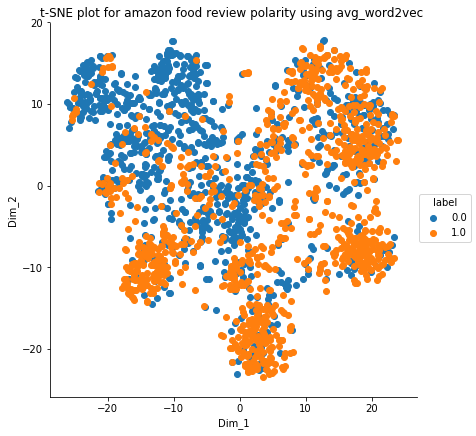

In [77]:
import seaborn as sn
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, all_avg_w2v[50])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("t-SNE plot for amazon food review polarity using avg_word2vec ")
plt.show()

Observation:
    Using average word2vec, we can see that positive words are more cluster compare to BOW but less than normal TFIDF, though there is some overlap of positive and negative words. 

# t-SNE on tfidf_w2v_df

In [58]:
tfidf_w2v_df=pd.read_csv("tfidf_w2v_df.csv")

In [64]:
tfidf_w2v_df.shape

(364171, 51)

In [65]:
tfidf_w2v_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Score
0,-0.093971,0.541751,-0.403214,0.404588,-0.092439,0.373489,0.244673,-1.273082,-0.087554,-0.177612,...,0.365361,-0.154763,0.300269,-0.552013,-0.543047,-0.481888,-0.28798,0.36913,0.273275,1.0


In [60]:
positive_tfidf_w2v=tfidf_w2v_df[tfidf_w2v_df.Score==1].head(1000)
negative_tfidf_w2v=tfidf_w2v_df[tfidf_w2v_df.Score==0].head(1000)
all_tfidf_w2v=np.vstack((positive_tfidf_w2v, negative_tfidf_w2v))

In [61]:
all_tfidf_w2v.shape

(2000, 51)

In [62]:
all_tfidf_w2v=pd.DataFrame(all_tfidf_w2v)

In [63]:
all_tfidf_w2v.head(1)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-0.093971,0.541751,-0.403214,0.404588,-0.092439,0.373489,0.244673,-1.273082,-0.087554,-0.177612,...,0.365361,-0.154763,0.300269,-0.552013,-0.543047,-0.481888,-0.28798,0.36913,0.273275,1.0


In [66]:
data=all_tfidf_w2v.loc[:, all_tfidf_w2v.columns != 50]
tsne = TSNE(n_components=2, random_state=0,n_jobs=5)
tsne_data1 = tsne.fit_transform(data)

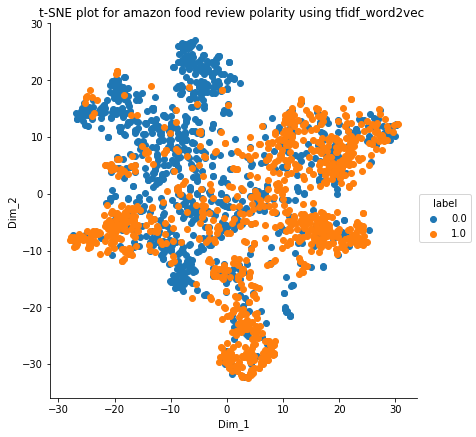

In [74]:
import seaborn as sn
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data1.T, all_tfidf_w2v[50])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("t-SNE plot for amazon food review polarity using tfidf_word2vec ")
plt.show()

Observation:
    Using TFIDF word2vec, we can see that positive words are more cluster compare to BOW, average word2vec and TFIDF, though there is fewer overlap of positive and negative words. 